# 10. Questions

* National prevalence rate over time
* National new diagnosis rate over time
* State prevalence over time
* State new diagnosis over time
* County prevalence over time
* County diagnoses over time

* National prevalence rate over time by race
* National new diagnosis rate over time by race
* State prevalence over time by race
* State new diagnosis over time by race
* County prevalence over time by race
* County diagnoses over time by race


# Atlas files

### Have
* us-newdx-overall.csv
* us-newdx-race.csv
* us-newdx-race-gender.csv
* us-prev-overall.csv
* us-prev-race.csv
* us-prev-race-gender.csv

* state-newdx-overall.csv
* state-newdx-race.csv
* state-newdx-race-gender.csv
* state-prev-overall.csv
* state-prev-race.csv
* state-prev-race-gender.csv

* county-newdx-overall.csv
* county-prev-overall.csv
* county-prev-race.csv

* us-newdx-transmission-overall.csv
* us-newdx-transmission-race.csv

* state-newdx-transmission-overall.csv
* state-newdx-transmission-race.csv


### Need

* us-newdx-transmission-race-gender.csv - SKIP FOR NOW, RELEVANCE?

* county-newdx-race.csv - NA from atlas
* county-newdx-race-gender.csv - NA from atlas
* county-prev-race-gender.csv - NA from atlas

* state-newdx-transmission-overall.csv
* state-newdx-transmission-race.csv
* state-newdx-transmission-race-gender.csv - SKIP FOR NOW, RELEVANCE?

* county-newdx-transmission-overall.csv - NA FROM ATLAS
* county-newdx-transmission-race.csv - NA FROM ATLAS


# Resources
* UConn paper -  https://today.uconn.edu/wp-content/uploads/2018/06/40615_2018_491_OnlinePDF.pdf
* Atlas - where all the data are coming from: https://www.cdc.gov/nchhstp/atlas/index.htm
* Atlas Glossary - https://gis.cdc.gov/grasp/nchhstpatlas/Content/docs/AtlasPlusGlossary.pdf



# NON-NERDS, IGNORE THIS STUFF

This section is just building the necessary functions to do the analysis. Skip to the part that says START HERE, if you just want the analysis part.

In [1]:
import pandas as pd

In [2]:
def make_numeric(df, col):
    
    """ Convert a column to numeric, stripping commas first """
    
    ret = df.copy()
    
    ret[col] = ret[col].apply(lambda x: str(x).replace(",",""))
    ret[col] = pd.to_numeric(ret[col], errors=coerce)
    
    return ret

In [3]:
def get_atlas_df(fname, numeric_columns=["Cases", "Rate per 100000", "Population"],
                   filter_by=lambda x: 1==1):
    
    """ get a dataframe from a CSV generated by atlas """
    
    ret = pd.read_csv(fname,skiprows=4)
    
    for c in numeric_columns:
        if c not in ret.columns.tolist(): continue
        ret = make_numeric(ret, c)
    
    ret = ret[ret.apply(filter_by, axis=1)]

    return ret
    
get_atlas_df("data/atlas/state-prev-race.csv").head()

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Transmission Category,Cases,Rate per 100000,Population
0,HIV prevalence,2015,Alabama,1,Ages 13 years and older,American Indian/Alaska Native,Both sexes,All transmission categories,5,21.3,23525
1,HIV prevalence,2015,Alabama,1,Ages 13 years and older,Asian,Both sexes,All transmission categories,32,58.9,54361
2,HIV prevalence,2015,Alabama,1,Ages 13 years and older,Black/African American,Both sexes,All transmission categories,7883,747.4,1054776
3,HIV prevalence,2015,Alabama,1,Ages 13 years and older,Hispanic/Latino,Both sexes,All transmission categories,370,267.7,138199
4,HIV prevalence,2015,Alabama,1,Ages 13 years and older,Native Hawaiian/Other Pacific Islander,Both sexes,All transmission categories,5,270.1,1851


In [4]:
ATLAS_DIR="data/atlas"
import os

def get_df(level, topic, subgroup):
    
    """ helper for get_atlas_df that assumes consistent directory structure and file name convention """
    
    return get_atlas_df(os.path.join(ATLAS_DIR, "-".join([level, topic, subgroup]) + ".csv"))

get_df("us","newdx","overall")

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Transmission Category,Cases,Rate per 100000,Population
0,HIV diagnoses,2010,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,43547,17.0,256410896
1,HIV diagnoses,2012,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,40928,15.7,261147538
2,HIV diagnoses,2014,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,40096,15.1,265896564
3,HIV diagnoses,2008,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,48213,19.2,251009998
4,HIV diagnoses,2013,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,39466,15.0,263493179
5,HIV diagnoses,2016,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,39660,14.7,270355878
6,HIV diagnoses,2015,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,39741,14.8,268159414
7,HIV diagnoses,2009,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,45601,18.0,253253138
8,HIV diagnoses,2011,United States,NaN,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,41786,16.1,258743354


In [5]:
def time_series(df, cols="Year", vals="Rate per 100000", index="Geography"):
    
    """ Convert a dataframe to a timeseries with one column per year """
    
    return pd.pivot_table(df, columns=cols, 
                         values=vals,
                         index=index)


# us_prevalence_race = get_df("us","prev","race")
# us_prevalence_black_timeseries = time_series(us_prevalence_race[us_prevalence_race["Race/Ethnicity"]=="Black/African American"])
# us_prevalence_black_timeseries\
# .sort_values(by=2015, ascending=False)\
# .head()

print "Overall U.S. HIV prevalence rates per 100,000"
time_series(get_df("us","prev","overall"))

Overall U.S. HIV prevalence rates per 100,000


Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
United States,314.0,322.2,329.7,336.8,343.5,349.6,355.8,362.3


In [6]:
def sub_timeseries(df, sub_col="Race/Ethnicity", 
                   cols="Year", 
                   vals="Rate per 100000", 
                   index="Geography"):
    
    """ Generate a dictionary of time series dataframes for a each unique value of a given sub_col """
        
    ret = {}
    
    for subg in df[sub_col].unique():
        ret[subg] = time_series(df[df[sub_col] == subg],
                               cols=cols,
                               vals=vals,
                               index=index)
        
    return ret
        
#states_prevalence_race_ts = sub_timeseries(get_df("state","prev","race"))
# states_prevalence_race_count_ts = sub_timeseries(states_prevalence_race,
#                                                 vals="Cases")

print """We have generated a separate timeseries dataframe of 
state-level prevalence rates for each of the following race groups: """

sub_timeseries(get_df("state","prev","race")).keys()

We have generated a separate timeseries dataframe of 
state-level prevalence rates for each of the following race groups: 


['Multiple races',
 'Native Hawaiian/Other Pacific Islander',
 'American Indian/Alaska Native',
 'Asian',
 'Black/African American',
 'White',
 'Hispanic/Latino']

In [7]:
def disparity_ratio(series_a, series_b):
    
    """ Generate a disparity ratio series from two series. Assumes a common key like geography or FIPS """
    
    return (series_a / series_b)#.sort_values(ascending=False)
    
    
print "Nationwide, 2015 black-white prevalence ratio"
float(disparity_ratio(sub_timeseries(get_df("us","prev","race"))["Black/African American"][2015],
                sub_timeseries(get_df("us","prev","race"))["White"][2015]))

Nationwide, 2015 black-white prevalence ratio


7.10849598163031

In [8]:

n = sub_timeseries(get_df("state","prev","race"))["Black/African American"].loc["Connecticut"][2015]
d = sub_timeseries(get_df("state","prev","race"))["White"].loc["Connecticut"][2015]

print "Connecticut, 2015 black-white prevalence disparity ratio"
print n, d, n / d

Connecticut, 2015 black-white prevalence disparity ratio
1140.8 145.4 7.84594222834


In [9]:
def disparity_ratio_timeseries(dfa, dfb):
    
    """ Create a table of disparity ratios from two tables """
    
    ret = None
    for c in filter(lambda x: x in dfb.columns.tolist(), dfa.columns.tolist()):
        
        if ret is None:
            ret = disparity_ratio(dfa[c], dfb[c]).to_frame()
        else:
            ret[c] = disparity_ratio(dfa[c], dfb[c]).to_frame()
            
    return ret

print "State-level black-white prevalence disparity"
        
disparity_ratio_timeseries(
    sub_timeseries(get_df("state","prev","race"))["Black/African American"],
    sub_timeseries(get_df("state","prev","race"))["White"]
).sort_values(by=2015, ascending=False).dropna(how="all")

State-level black-white prevalence disparity


,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
North Dakota,19.553279,19.138340,19.585455,17.897959,20.902597,20.337793,23.585987,22.875380
South Dakota,32.704485,30.335025,30.241096,26.145455,21.138462,19.833333,21.881818,22.211790
Idaho,8.179191,7.367647,13.185008,12.471963,12.743902,13.559471,13.017647,15.311669
Maine,10.335085,10.867779,11.348055,11.412930,11.535457,12.440488,13.728335,14.036574
New Hampshire,16.837410,16.544034,14.787634,13.766404,13.671855,13.099363,13.197789,13.222087
Pennsylvania,13.091001,13.059980,12.435349,12.442220,12.508475,12.445223,12.436910,12.382872
Wisconsin,12.784091,12.666055,11.487762,11.581475,11.320534,12.435407,12.376972,11.895223
Minnesota,13.352663,13.158495,12.056667,11.928261,12.028723,11.748958,11.507143,11.382851
Utah,11.335308,10.981374,11.405535,11.406800,10.312715,11.107843,11.012862,11.092772


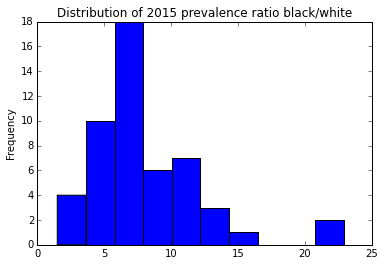

In [10]:
%matplotlib inline 
disparity_ratio_timeseries(
    sub_timeseries(get_df("state","prev","race"))["Black/African American"],
    sub_timeseries(get_df("state","prev","race"))["White"]

)[2015].plot.hist(title="Distribution of 2015 prevalence ratio black/white")

In [11]:
print "Distribution of 2015 prevalence ratio black/white"

disparity_ratio_timeseries(
    sub_timeseries(get_df("state","prev","race"))["Black/African American"],
    sub_timeseries(get_df("state","prev","race"))["White"]
)[2015].describe()

Distribution of 2015 prevalence ratio black/white


count    51.000000
mean      8.039435
std       4.185548
min       1.497814
25%       5.532801
50%       7.097357
75%       9.935452
max      22.875380
Name: 2015, dtype: float64

## Auto-loading tables with multiple variable columns

In [12]:
import itertools
import collections

# Solution here: https://gist.github.com/angstwad/bf22d1822c38a92ec0a9
def dict_merge(dct, merge_dct):
    """ Recursive dict merge. Inspired by :meth:``dict.update()``, instead of
    updating only top-level keys, dict_merge recurses down into dicts nested
    to an arbitrary depth, updating keys. The ``merge_dct`` is merged into
    ``dct``.
    :param dct: dict onto which the merge is executed
    :param merge_dct: dct merged into dct
    :return: None
    """
    for k, v in merge_dct.iteritems():
        if (k in dct and isinstance(dct[k], dict)
                and isinstance(merge_dct[k], collections.Mapping)):
            dict_merge(dct[k], merge_dct[k])
        else:
            dct[k] = merge_dct[k]
            
def multi_sub_timeseries(df, sub_cols=["Race/Ethnicity","Sex"], 
                   cols="Year", 
                   vals="Rate per 100000", 
                   index="Geography"):
    
    """ Generate a dict of time series with multiple variable columns, such as by race and gender """

    group_arrs = map(lambda x: df[x].unique(), sub_cols)

    def reduce_perm(perm):
        return reduce((lambda x, y: {y:x}), reversed(perm + [None]))
    
    permutations = [list(x) for x in list(itertools.product(*group_arrs))]
    
    for p in permutations:
        pass
    #print reduce_perm(p)
        
    ret = {}
    
    for perm_dict in permutations:
        dict_merge(ret, reduce_perm(perm_dict))
                
            
    def walk(frame, node, level):
        nodeframe = frame.copy()
        
        if node is None:
            leafdf = time_series(nodeframe,
                               vals=vals, 
                               index=index)
            return leafdf
    
        for k in node.keys():
            nf = nodeframe.copy()
            nf = nf[nf[sub_cols[level]] == k]
            node[k] = walk(nf, node[k], level+1)
        
        return node
    walk(df, ret, 0)
    
    return ret



print multi_sub_timeseries(get_df("us","prev","race-gender"))["White"]["Male"]
print multi_sub_timeseries(get_df("us","prev","race-gender"))["Black/African American"]["Male"]

print
print "Black-white prevalence disparity ratio"
disparity_ratio_timeseries(
    multi_sub_timeseries(get_df("us","prev","race-gender"))["Black/African American"]["Male"],
    multi_sub_timeseries(get_df("us","prev","race-gender"))["White"]["Male"],
)

Year            2008   2009   2010   2011   2012   2013   2014   2015
Geography                                                            
United States  266.2  272.6  281.8  287.6  293.2  298.6  303.9  309.2
Year             2008    2009    2010    2011    2012    2013    2014    2015
Geography                                                                    
United States  1481.1  1523.1  1566.1  1600.9  1632.1  1662.2  1694.6  1730.3

Black-white prevalence disparity ratio


,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
United States,5.563862,5.587307,5.557488,5.566412,5.566508,5.566644,5.576176,5.596054


In [13]:
import us

def state_name(geography):
        
    if ", " in str(geography):
        return us.states.lookup(geography[-2:]).name
   
    try:
        return us.states.lookup(unicode(geography).zfill(2)).name
    except:
        pass
    
    return geography

print state_name(u"Abbeville County, SC")
print state_name(9)
print state_name("CT")
print state_name("Farfield County, CT")

South Carolina
Connecticut
Connecticut
Connecticut


In [14]:
def is_new_england_state(st, allow_us=True, ct_only=False):
    
    ne_states = [
        "Connecticut",
        "Massachusetts",
        "Rhode Island",
        "Maine",
        "New Hampshire",
        "Vermont"
    ]
    
    if allow_us:
        ne_states = ne_states + ["United States"]
        
    if ct_only:
        ne_states = ["Connecticut"]
        
    return state_name(st).upper().strip() in [str(x).upper().strip() for x in  ne_states]

def just_new_england(df, allow_us=True, ct_only=False):
    return df[df.index.map(lambda x: is_new_england_state(x, allow_us=allow_us, ct_only=ct_only))]

just_new_england(
    time_series(
        pd.concat([
            get_df("state","newdx","overall"),
            get_df("us","newdx","overall")
        ])
    )
)

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Connecticut,12.2,12.1,13.1,11.8,9.6,10.7,9.5,8.9,8.2
Maine,4.0,4.9,4.9,4.3,4.1,2.8,4.8,4.0,4.3
Massachusetts,13.6,12.5,12.8,12.6,12.4,12.0,11.4,10.5,12.1
New Hampshire,3.9,3.6,4.5,3.5,4.2,3.0,3.6,2.1,3.6
Rhode Island,14.0,13.6,13.0,11.2,8.7,8.7,9.8,7.0,7.7
United States,19.2,18.0,17.0,16.1,15.7,15.0,15.1,14.8,14.7
Vermont,3.6,3.4,3.9,2.2,2.8,2.2,3.5,2.4,1.5


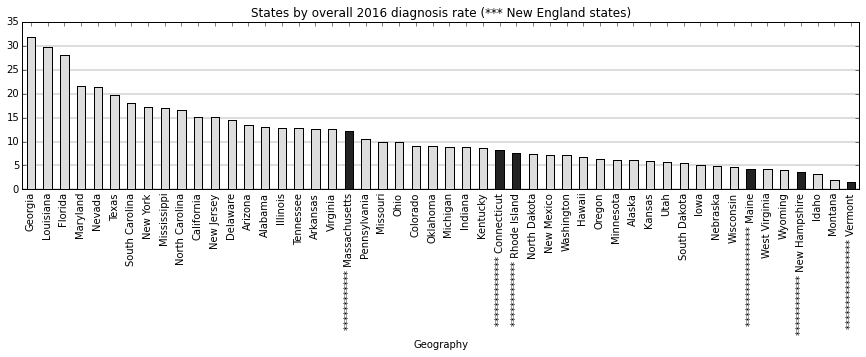

In [15]:
import matplotlib.pyplot as plt

def state_bars(ser, title=None, no_dc=True):
    
    if no_dc:
        ser = ser.copy()[ser.index != "District of Columbia"]
    
    def pick_color(l):
        if is_new_england_state(l):
            return "#222222"
        return "#dddddd"

    colors = ser.sort_values(ascending=False).index.map(pick_color).tolist()

        
    ax = ser.plot.bar(figsize=(15,3),
                     title=title,
                     color=colors)
#                     color="#000000")

    def format_func(value, tick_number):
        lbl = ser.index[tick_number]
        if is_new_england_state(lbl):
            lbl = ("*" * (25 - len(lbl))) + " " + lbl
        return lbl
    
    
    
    ax.grid(color="#dddddd", linestyle='-', linewidth=2, axis='y')
    
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_axisbelow(True)

state_bars(time_series(get_df("state","newdx","overall"))[2016].sort_values(ascending=False),
          title="States by overall 2016 diagnosis rate (*** New England states)")


# START HERE: Analysis

### How many people have HIV in the US and New England?

All of the numbers in this section are absolutes, not rates adjusted for population.

In [16]:
print "The number of people living with HIV in the U.S. and New England states"

just_new_england(
    time_series(
        pd.concat([
            get_df("us","prev","overall"),
            get_df("state","prev","overall")
        ]
    ),
         vals="Cases")
)

The number of people living with HIV in the U.S. and New England states


Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
Connecticut,9544,9658,10310,10296,10343,10580,10191,10360
Maine,984,1021,1278,1298,1318,1361,1442,1478
Massachusetts,16262,16679,17189,17901,18592,19045,19412,19665
New Hampshire,1047,1065,1109,1127,1141,1164,1217,1236
Rhode Island,1922,2004,2129,2153,2178,2210,2307,2357
United States,788114,815891,845351,871458,896979,921188,946029,971524
Vermont,403,414,477,512,570,614,662,671


In [17]:
print "Total New England HIV cases (prevalence)"

just_new_england(
    time_series(
            get_df("state","prev","overall"),
            vals="Cases"
    ),
).sum().to_frame().transpose()

Total New England HIV cases (prevalence)


Year,2008,2009,2010,2011,2012,2013,2014,2015
0,30162,30841,32492,33287,34142,34974,35231,35767


### How many people were diagnosed with HIV each year?

All of the numbers in this section are absolutes, not adjusted for population.

In [18]:
print "U.S. and New England HIV diagnoses per year"

just_new_england(
    time_series(
        pd.concat([
            get_df("us","newdx","overall"),
            get_df("state","newdx","overall")
        ]
    ),
         vals="Cases")
)

U.S. and New England HIV diagnoses per year


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Connecticut,357,357,396,358,291,328,290,273,251
Maine,45,55,56,49,47,32,55,46,50
Massachusetts,750,699,714,706,702,689,659,612,710
New Hampshire,44,40,50,39,47,34,41,24,42
Rhode Island,125,122,117,101,78,79,89,64,70
United States,48213,45601,43547,41786,40928,39466,40096,39741,39660
Vermont,19,18,21,12,15,12,19,13,8


In [19]:
print "Total New England HIV diagnoses per year"

just_new_england(
    time_series(
        get_df("state","newdx","overall"),
        vals="Cases"
    )
).sum().to_frame().transpose()


Total New England HIV diagnoses per year


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1340,1291,1354,1265,1180,1174,1153,1032,1131


In [20]:
print "Number of black diagnoses"
just_new_england(
    multi_sub_timeseries(get_df("state","newdx","race"),
                         sub_cols=["Race/Ethnicity"],
                         vals="Cases")["Black/African American"]
)


Number of black diagnoses


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Connecticut,135,149,145,132,118,127,131,98,110
Maine,4,10,15,16,9,10,20,14,16
Massachusetts,245,221,217,237,219,187,208,183,231
New Hampshire,10,4,2,4,7,2,8,4,7
Rhode Island,33,23,28,16,17,14,18,15,18
Vermont,0,1,1,1,2,3,5,0,1


In [21]:
print "Number of hispanic diagnoses"
just_new_england(
    multi_sub_timeseries(get_df("state","newdx","race"),
                         sub_cols=["Race/Ethnicity"],
                         vals="Cases")["Hispanic/Latino"]
)


Number of hispanic diagnoses


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Connecticut,108,93,105,110,85,94,71,79,71
Maine,3,4,0,2,3,2,4,4,1
Massachusetts,172,188,184,176,187,206,178,167,183
New Hampshire,7,4,3,3,3,4,7,0,7
Rhode Island,41,51,31,22,23,20,26,21,18
Vermont,1,0,2,1,0,0,1,2,0


In [22]:
print "Number of white diagnoses"
just_new_england(
    multi_sub_timeseries(get_df("state","newdx","race"),
                         sub_cols=["Race/Ethnicity"],
                         vals="Cases")["White"]
)


Number of white diagnoses


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Connecticut,98,102,133,106,77,100,75,86,65
Maine,38,36,39,31,31,19,30,27,33
Massachusetts,291,262,281,246,255,267,232,229,253
New Hampshire,24,30,40,31,33,25,24,19,25
Rhode Island,48,42,53,53,34,42,37,25,31
Vermont,17,17,16,10,11,8,11,10,7


In [23]:
just_new_england(
    time_series(
            get_df("state","newdx","overall"),
            vals="Cases"
    ),
).sum().to_frame().transpose()

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1340,1291,1354,1265,1180,1174,1153,1032,1131


### Question: How do New England states compare to states nationwide for overall HIV diagnoses and prevalence?

All New England states have overall diagnosis and prevalence rates lower than the national rate of 14.7.

In [24]:
print
print "U.S. and New England new diagnoses for all groups"
pd.concat([
    just_new_england(time_series(get_df("state","newdx","overall"))),
    time_series(get_df("us","newdx","overall"))]
).sort_values(by=2016,ascending=False)


U.S. and New England new diagnoses for all groups


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,19.2,18.0,17.0,16.1,15.7,15.0,15.1,14.8,14.7
Massachusetts,13.6,12.5,12.8,12.6,12.4,12.0,11.4,10.5,12.1
Connecticut,12.2,12.1,13.1,11.8,9.6,10.7,9.5,8.9,8.2
Rhode Island,14.0,13.6,13.0,11.2,8.7,8.7,9.8,7.0,7.7
Maine,4.0,4.9,4.9,4.3,4.1,2.8,4.8,4.0,4.3
New Hampshire,3.9,3.6,4.5,3.5,4.2,3.0,3.6,2.1,3.6
Vermont,3.6,3.4,3.9,2.2,2.8,2.2,3.5,2.4,1.5


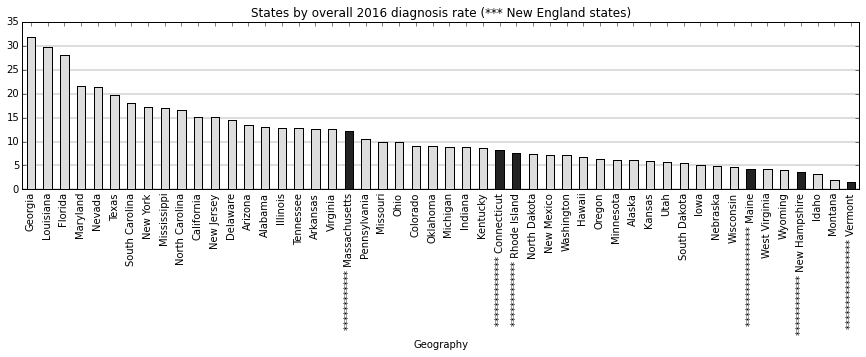

In [25]:
state_bars(time_series(get_df("state","newdx","overall"))[2016].sort_values(ascending=False),
          title="States by overall 2016 diagnosis rate (*** New England states)")

In [26]:
print 
print "U.S. and New England state Prevalence for all groups"

pd.concat([
    time_series(get_df("us","prev","overall")),
    just_new_england(time_series(get_df("state","prev","overall")))
]).sort_values(by=2015,ascending=False)


U.S. and New England state Prevalence for all groups


Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
United States,314.0,322.2,329.7,336.8,343.5,349.6,355.8,362.3
Connecticut,325.4,327.2,342.0,339.7,339.9,346.4,333.2,338.7
Massachusetts,294.0,298.9,308.5,318.4,327.8,332.7,336.3,338.4
Rhode Island,215.1,224.0,237.1,239.5,241.7,244.8,254.7,259.5
Maine,87.1,90.3,112.3,113.8,115.2,118.7,125.4,128.5
Vermont,75.5,77.4,88.8,95.0,105.6,113.3,122.0,123.7
New Hampshire,93.6,94.7,99.0,100.2,100.8,102.4,106.3,107.6


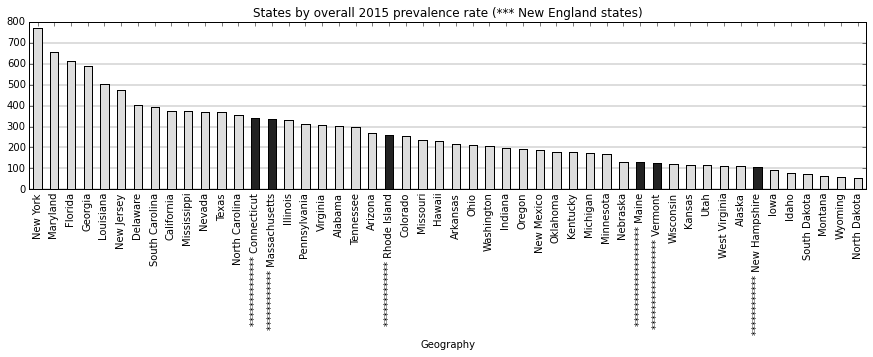

In [27]:
state_bars(time_series(get_df("state","prev","overall"))[2015].sort_values(ascending=False),
          title="States by overall 2015 prevalence rate (*** New England states)")

### Question: Is that because New England is more white than the nation as a whole?

Let's look at the population breakdown by race for states and the US


White percent of total population, U.S. and New England states
(only for rough approximating purposes, based on adding subgroups)


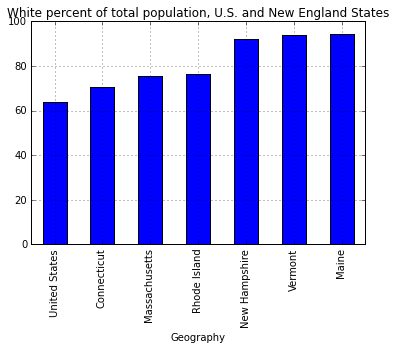

In [28]:

def population_composition(df, year=2015):
    
    ret = df.copy()
    
    ret = ret[ret["Year"] == year]
    
    races = ret["Race/Ethnicity"].unique()
    
    ret = pd.pivot_table(ret,
                        columns="Race/Ethnicity",
                        values="Population",
                        index="Geography")
    
    ret["sum"] = ret.sum(axis=1)
    
    for r in races:
        ret[r] = ret[r] * 100 / ret["sum"]
        
    return ret[ret.columns[:-1]]
    

print
print "White percent of total population, U.S. and New England states"
print "(only for rough approximating purposes, based on adding subgroups)"
    
just_new_england(
    population_composition(   
        pd.concat([
            get_df("us","prev","race"),
            get_df("state","prev","race")
        ])
    )
)["White"]\
.sort_values()\
.plot.bar(
    xlim=100,
    legend=None,
    title="White percent of total population, U.S. and New England States",
    color="blue",
    grid=True
)


In [29]:
print
print "White percent of total population, U.S. and New England states"
print "(only for rough approximating purposes, based on adding subgroups)"
    
just_new_england(
    population_composition(   
        pd.concat([
            get_df("us","prev","race"),
            get_df("state","prev","race")
        ])
    )
)["White"]


White percent of total population, U.S. and New England states
(only for rough approximating purposes, based on adding subgroups)


Geography
Connecticut      70.588301
Maine            94.485795
Massachusetts    75.546430
New Hampshire    92.050125
Rhode Island     76.435782
United States    63.869880
Vermont          93.919271
Name: White, dtype: float64

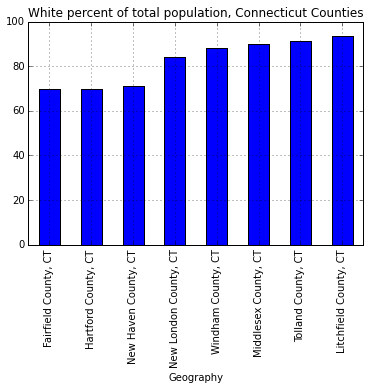

In [30]:

just_new_england(
    population_composition(   
            get_df("county","prev","race"),
    ),
    ct_only=True
)["White"]\
.sort_values()\
.plot.bar(
    xlim=100,
    legend=None,
    title="White percent of total population, Connecticut Counties",
    color="blue",
    grid=True
)


In [31]:
just_new_england(
    pd.pivot_table(
        get_df("county","prev","race"),
        columns="Race/Ethnicity",
        values="Population",
        index="Geography"
    ),
    ct_only=True
)

Race/Ethnicity,Black/African American,Hispanic/Latino,White
Geography,,,
"Fairfield County, CT",84552.0,139826.0,516538.0
"Hartford County, CT",96497.0,118509.0,497749.0
"Litchfield County, CT",2141.0,7935.0,145725.0
"Middlesex County, CT",6594.0,7410.0,122662.0
"New Haven County, CT",88236.0,112548.0,493344.0
"New London County, CT",13000.0,20924.0,182290.0
"Tolland County, CT",4382.0,6481.0,115056.0
"Windham County, CT",1831.0,9803.0,85554.0


### State-level diagnosis among racial/ethnic subgroups

Isolating just the black population, Massachusetts and Maine have higher-than-national new diagnosis rates. Connecticut still has a lower black diagnosis rate than the national rate. Massachusetts is not far above the national rate, and its rate has stayed fairly close the national rate since 2008. 

In [32]:
def us_state_timeseries(topic, race):
    return pd.concat([
        multi_sub_timeseries(get_df("us",topic,"race"), sub_cols=["Race/Ethnicity"])[race],
            multi_sub_timeseries(
                get_df("state",topic,"race"),
                sub_cols=["Race/Ethnicity"])[race]
    ])\
    #.sort_values(by=2016, ascending=False)
    
def us_ne_timeseries(topic, race):
    return just_new_england(us_state_timeseries(topic, race))

print
print "U.S. and New England states new diagnosis rates for black/african american"

us_ne_timeseries("newdx","Black/African American").sort_values(by=2016, ascending=False)


U.S. and New England states new diagnosis rates for black/african american


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Maine,43.1,103.2,137.2,137.9,73.7,79.9,154.9,105.2,115.8
Massachusetts,78.4,69.5,63.3,67.5,60.9,50.7,55.0,47.4,58.6
United States,74.8,69.3,64.8,60.7,57.4,54.4,53.9,53.1,52.9
New Hampshire,92.9,35.6,18.3,35.0,57.2,15.7,62.3,30.5,51.3
Connecticut,50.9,55.5,52.0,46.7,41.2,43.6,44.6,33.0,36.6
Rhode Island,78.7,54.4,61.0,34.3,36.1,29.2,36.8,30.1,35.6
Vermont,0.0,24.9,22.0,20.8,39.9,55.8,89.4,0.0,16.7


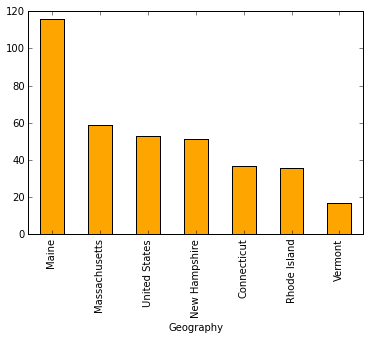

In [33]:
# same as above, as a bar chart
us_ne_timeseries("newdx","Black/African American").sort_values(by=2016, ascending=False)\
.sort_values(by=2016, ascending=False)[2016].plot.bar(color="orange")

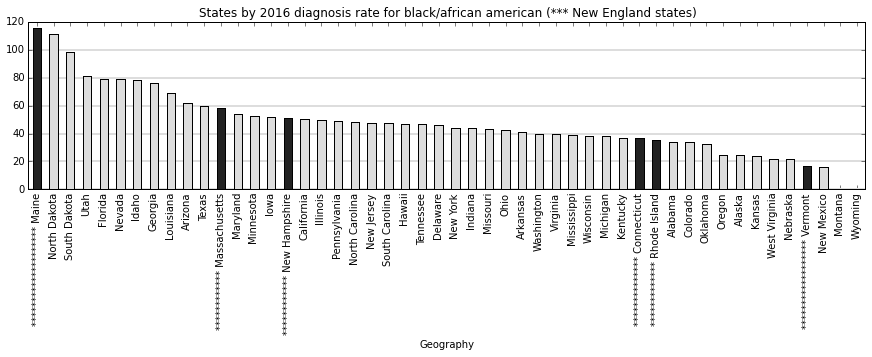

In [34]:
state_bars(
    sub_timeseries(get_df("state","newdx","race"))["Black/African American"][2016].sort_values(ascending=False),
    title="States by 2016 diagnosis rate for black/african american (*** New England states)"
)

##### Note: Improvement in Hispanic diagnosis rate

Below we see that Connecticut went from having worse-than-national diagnosis rates (34 CT, 29 US) for Hispanics to having better-than national (16 CT, 22 US).

In [35]:

print
print "U.S. and New England states new diagnosis rates for hispanic/latino"

us_ne_timeseries("newdx","Hispanic/Latino")

# Commenting this out because it's redundant with the chart below
# .sort_values(by=2016, ascending=False)[2016].plot.bar(color="orange")


U.S. and New England states new diagnosis rates for hispanic/latino


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,29.2,27.3,24.8,23.8,23.2,22.2,23.1,22.5,22.2
Connecticut,34.2,28.4,28.7,29.1,21.8,23.4,17.2,18.7,16.4
Maine,23.7,30.3,0.0,15.5,22.3,14.2,26.8,25.8,6.2
Massachusetts,40.7,42.8,38.4,35.3,36.0,38.2,31.8,28.8,30.5
New Hampshire,27.2,15.0,11.2,10.7,10.1,12.8,21.6,0.0,19.6
Rhode Island,44.9,54.0,31.6,21.6,21.9,18.5,23.2,18.1,15.0
Vermont,14.5,0.0,27.6,13.1,0.0,0.0,11.4,22.0,0.0


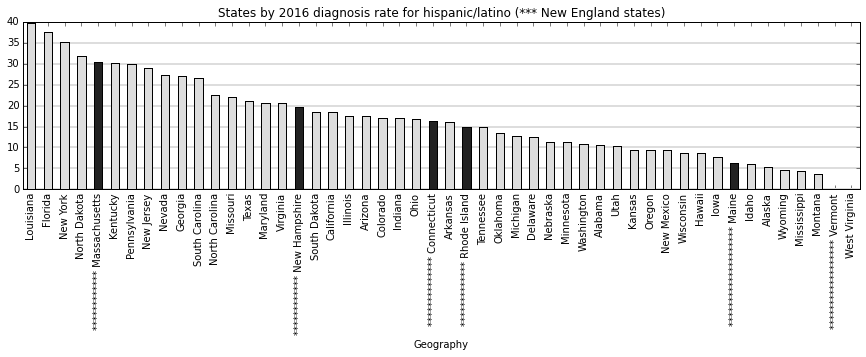

In [36]:
state_bars(
    sub_timeseries(get_df("state","newdx","race"))["Hispanic/Latino"][2016].sort_values(ascending=False),
    title="States by 2016 diagnosis rate for hispanic/latino (*** New England states)"
)

In [37]:
print
print "U.S. and New England states new diagnosis rates for white"

us_ne_timeseries("newdx","White")\

# Commenting out because as a chart it is redundant with the next cell
#.sort_values(by=2016, ascending=False)[2016].plot.bar(color="orange")


U.S. and New England states new diagnosis rates for white


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,7.6,7.1,6.8,6.5,6.5,6.2,6.2,6.1,6.0
Connecticut,4.4,4.6,6.0,4.8,3.5,4.6,3.4,4.0,3.0
Maine,3.5,3.3,3.6,2.9,2.9,1.7,2.8,2.5,3.0
Massachusetts,6.5,5.8,6.4,5.6,5.8,6.1,5.3,5.2,5.8
New Hampshire,2.3,2.8,3.8,3.0,3.1,2.4,2.3,1.8,2.4
Rhode Island,6.6,5.8,7.4,7.5,4.8,6.0,5.3,3.6,4.5
Vermont,3.3,3.3,3.1,2.0,2.2,1.6,2.2,2.0,1.4


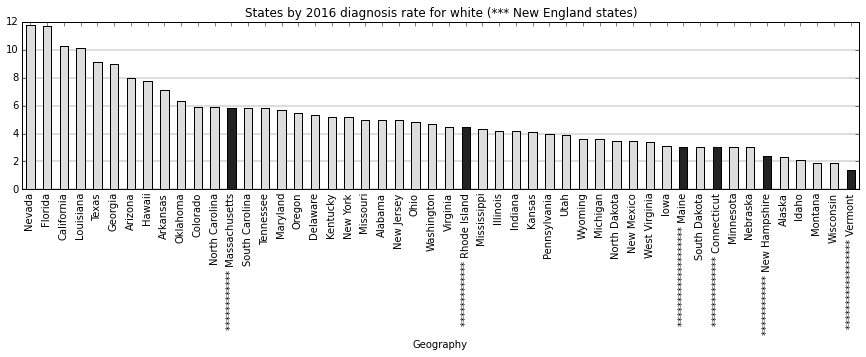

In [38]:
state_bars(
    sub_timeseries(get_df("state","newdx","race"))["White"][2016].sort_values(ascending=False),
    title="States by 2016 diagnosis rate for white (*** New England states)"
)

### State rank based on diagnosis rates of racial subgroups

Ranked from highest to lowest rate, so rank of 1 has the highest rate, sorted by 2016 rank

In [39]:
print "State rank for black diagnosis rate"

just_new_england(
    sub_timeseries(get_df("state","newdx","race"))["Black/African American"].rank(ascending=False)\
    .sort_values(by=2016,ascending=False)
)

State rank for black diagnosis rate


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Vermont,51.0,47.0,48.0,48.0,32.5,10.0,4.0,51.0,48.0
Rhode Island,10.0,21.0,15.0,37.0,37.0,43.0,40.0,44.0,39.0
Connecticut,26.0,20.0,22.0,20.0,29.0,24.0,26.0,38.0,38.0
New Hampshire,7.0,41.0,49.0,36.0,12.0,50.0,11.0,43.0,17.0
Massachusetts,11.0,12.5,12.0,7.5,10.0,17.0,15.0,20.0,13.0
Maine,36.0,3.0,3.0,2.0,4.0,2.0,1.0,2.0,1.0


##### Note: Connecticut improvement in Hispanic diagnosis ranking

States, especially small ones, jump around in rankings, but Connecticut improved from having the 12th-highest to the 26th-highest Hispanic diagnosis rates from 2008 to 2016. This aligns with other findings about diagnoses.

In [40]:
print "State rank for Hispanic diagnosis rate"

just_new_england(
    sub_timeseries(get_df("state","newdx","race"))["Hispanic/Latino"].rank(ascending=False)\
    .sort_values(by=2016,ascending=False)
)

State rank for Hispanic diagnosis rate


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Vermont,40.0,50.5,13.0,37.5,50.5,51.0,38.0,14.0,50.5
Maine,24.0,14.0,51.0,30.5,16.0,32.0,10.5,9.0,44.0
Rhode Island,6.0,4.0,10.0,19.0,18.0,21.0,15.0,24.0,28.0
Connecticut,12.0,16.0,12.0,11.0,19.0,13.0,25.5,22.0,26.0
New Hampshire,20.0,39.0,42.0,43.0,40.0,38.0,18.0,51.0,18.0
Massachusetts,7.0,6.0,4.0,7.0,5.0,3.0,6.0,6.0,6.0


In [41]:
print "State rank for white diagnosis rate"

just_new_england(
    sub_timeseries(get_df("state","newdx","race"))["White"].rank(ascending=False)\
    .sort_values(by=2016,ascending=False)
)

State rank for white diagnosis rate


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
Vermont,44.0,45.0,44.5,48.0,46.0,50.5,45.0,46.0,51.0
New Hampshire,47.5,47.5,37.5,41.0,41.5,43.5,44.0,48.5,46.0
Connecticut,36.0,35.0,18.5,30.0,37.5,31.0,39.5,33.0,43.0
Maine,43.0,45.0,40.0,42.5,43.0,48.0,43.0,43.0,43.0
Rhode Island,18.0,23.5,12.0,9.0,30.0,15.5,23.0,36.5,27.5
Massachusetts,19.5,23.5,16.0,21.0,20.5,14.0,23.0,23.5,15.0


### Prevalence rates by state for racial subgroups

In [42]:
print
print "U.S. and New England states prevalence for black/african american"

us_ne_timeseries("prev","Black/African American")\

# Redundant as chart
#.sort_values(by=2015, ascending=False)[2015].plot.bar(color="blue")


U.S. and New England states prevalence for black/african american


Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
United States,1086.2,1114.2,1141.3,1163.2,1182.5,1200.0,1218.1,1238.3
Connecticut,1119.7,1135.9,1154.8,1148.0,1155.2,1171.2,1139.5,1140.8
Maine,786.5,846.6,1079.2,1094.5,1122.4,1222.9,1409.9,1458.4
Massachusetts,1464.1,1487.8,1428.5,1454.0,1478.1,1472.8,1480.2,1474.1
New Hampshire,1170.2,1164.7,1100.2,1049.0,1054.1,1028.3,1074.3,1089.5
Rhode Island,1116.1,1137.8,1113.1,1079.8,1069.5,1065.0,1085.4,1100.8
Vermont,866.6,846.2,968.5,914.6,958.3,1097.5,1144.3,1068.4


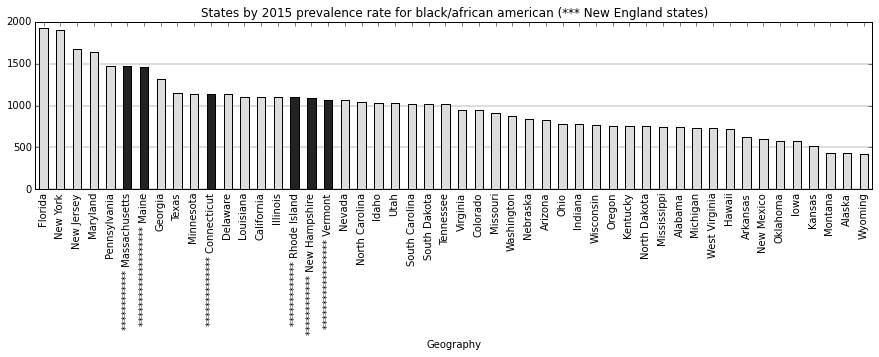

In [43]:
state_bars(
    sub_timeseries(get_df("state","prev","race"))["Black/African American"][2015].sort_values(ascending=False),
    title="States by 2015 prevalence rate for black/african american (*** New England states)"
)

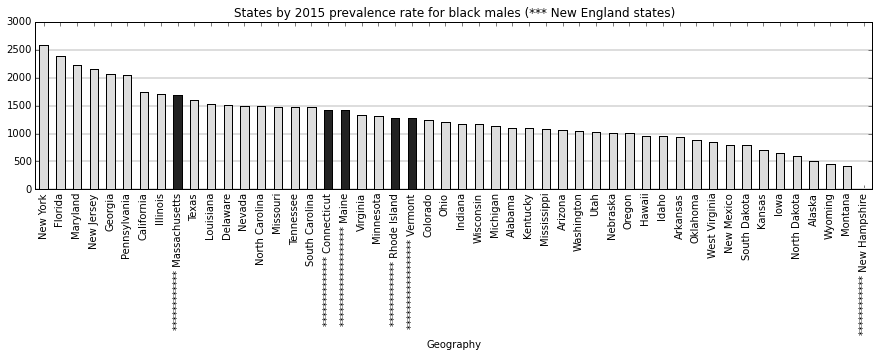

In [44]:
state_bars(
    multi_sub_timeseries(get_df("state","prev","race-gender"),sub_cols=["Race/Ethnicity","Sex"])["Black/African American"]["Male"][2015].sort_values(ascending=False),
    title="States by 2015 prevalence rate for black males (*** New England states)"
)


In [45]:
print
print "U.S. and New England states prevalence for Hispanic/Latino"

us_ne_timeseries("prev","Hispanic/Latino")\

# Redundant
#.sort_values(by=2015, ascending=False)[2015].plot.bar(color="blue")



U.S. and New England states prevalence for Hispanic/Latino


Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
United States,470.7,476.5,467.6,473.5,480.2,485.2,490.8,496.8
Connecticut,1023.0,992.7,972.5,934.6,910.3,894.3,829.5,829.9
Maine,497.8,507.3,669.2,675.5,594.3,651.8,617.3,625.4
Massachusetts,954.2,945.1,916.2,926.8,926.7,927.4,912.1,899.8
New Hampshire,560.2,542.0,602.6,560.4,510.3,484.8,511.8,485.0
Rhode Island,523.4,552.8,572.4,544.2,542.1,535.6,545.2,540.9
Vermont,407.1,389.8,510.7,485.4,489.5,438.4,490.3,604.5


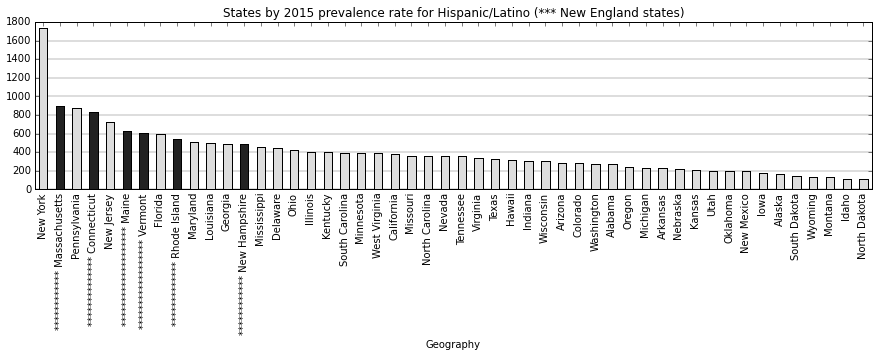

In [46]:
state_bars(
    sub_timeseries(get_df("state","prev","race"))["Hispanic/Latino"][2015].sort_values(ascending=False),
    title="States by 2015 prevalence rate for Hispanic/Latino (*** New England states)"
)

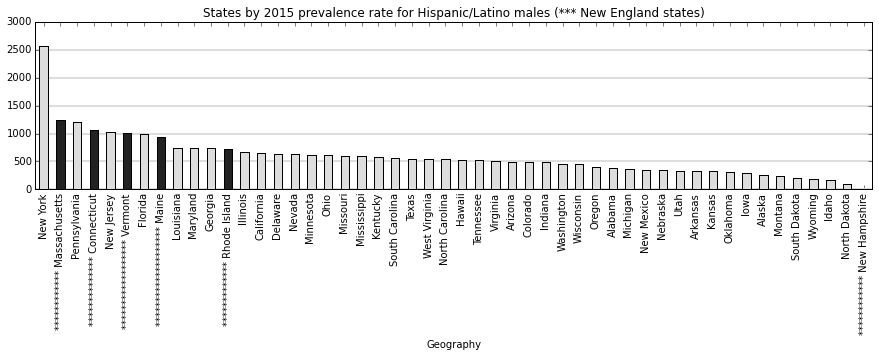

In [47]:
state_bars(
    multi_sub_timeseries(get_df("state","prev","race-gender"),sub_cols=["Race/Ethnicity","Sex"])["Hispanic/Latino"]["Male"][2015].sort_values(ascending=False),
    title="States by 2015 prevalence rate for Hispanic/Latino males (*** New England states)"
)


In [48]:
print
print "U.S. and New England states prevalence for white"

us_ne_timeseries("prev","White").sort_values(by=2015, ascending=False)\

# Redundant
#.sort_values(by=2015, ascending=False)[2015].plot.bar(color="blue")



U.S. and New England states prevalence for white


Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
Massachusetts,158.7,160.8,167.4,172.1,177.0,179.2,180.7,181.8
United States,149.9,153.5,158.7,162.0,165.1,168.2,171.1,174.2
Rhode Island,123.1,126.5,136.1,142.1,144.1,146.6,152.3,155.1
Connecticut,138.3,138.5,145.2,145.0,145.0,149.0,142.6,145.4
Maine,76.1,77.9,95.1,95.9,97.3,98.3,102.7,103.9
Vermont,63.1,65.2,74.5,81.0,89.1,94.9,102.0,101.9
New Hampshire,69.5,70.4,74.4,76.2,77.1,78.5,81.4,82.4


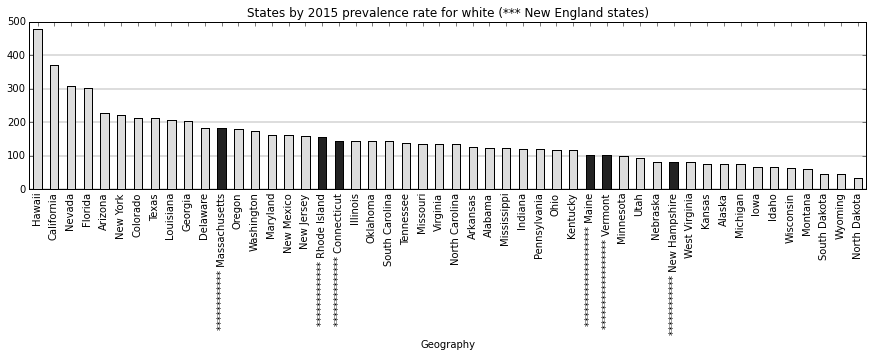

In [49]:
state_bars(
    sub_timeseries(get_df("state","prev","race"))["White"][2015].sort_values(ascending=False),
    title="States by 2015 prevalence rate for white (*** New England states)"
)

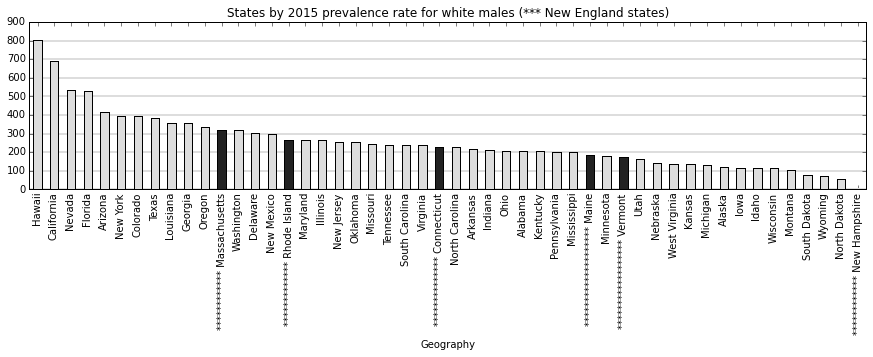

In [50]:
state_bars(
    multi_sub_timeseries(get_df("state","prev","race-gender"),sub_cols=["Race/Ethnicity","Sex"])["White"]["Male"][2015].sort_values(ascending=False),
    title="States by 2015 prevalence rate for white males (*** New England states)"
)


### Note: Small-states problem

Beware when comparing small and large states, that northern New England states have black populations so small that a very small number of cases can skew the rates. Let's look at the black population for each state in 2016.

For example, in Vermont, each individual person diagnosed with HIV sends the state's black per-capita diagnosis rate up by 16 points, but in Connecticut, each person only sends the rate up by 0.33 points (on third of one point), as indicated by the "weight" column in the table below. The cases column shows the number of cases, which in Vermont is one.

In [51]:
print 
print "Black population (2016) and per-capita weighting for new diagnoses"
tmpdf = just_new_england(get_df("state","newdx","race").set_index("Geography"))

tmpdf = tmpdf[(tmpdf["Year"] == 2016) & (tmpdf["Race/Ethnicity"] == "Black/African American")]

tmpdf["Weight"] = 100000 / tmpdf["Population"].astype(int) 
tmpdf[["Population","Weight", "Cases"]].sort_values(by="Population", ascending=False)


Black population (2016) and per-capita weighting for new diagnoses


,Population,Weight,Cases
Geography,,,
Massachusetts,394006,0.253803,231
Connecticut,300201,0.333110,110
Rhode Island,50511,1.979767,18
Maine,13816,7.237985,16
New Hampshire,13646,7.328155,7
Vermont,5998,16.672224,1


In [52]:
print 
print "Overall population 2016 and per-capita weighting for new diagnoses"

tmpdf = just_new_england(get_df("state","newdx","overall").set_index("Geography"))

tmpdf = tmpdf[(tmpdf["Year"] == 2016)]

tmpdf["Weight"] = 100000 / tmpdf["Population"].astype(int) 
tmpdf[["Population","Weight", "Cases"]].sort_values(by="Population", ascending=False)


Overall population 2016 and per-capita weighting for new diagnoses


,Population,Weight,Cases
Geography,,,
Massachusetts,5843911,0.017112,710
Connecticut,3056982,0.032712,251
New Hampshire,1154944,0.086584,42
Maine,1153216,0.086714,50
Rhode Island,910074,0.109881,70
Vermont,541898,0.184537,8


### Question: What New England counties stand out for prevalence and diagnoses

### These NE counties are in the top 10% of the nation for prevalence

All counties with a rank below 300 in the table below are in the top 10% for having the highest prevalence of HIV

In [53]:
print
print "Prevalence of top New England Counties"
print "(National prevalence is 362.3)"

just_new_england(time_series(get_df("county","prev","overall")).sort_values(by=2015, ascending=False)).head(10)


Prevalence of top New England Counties
(National prevalence is 362.3)


Year,2015
Geography,
"Suffolk County, MA",846.4
"Hampden County, MA",480.9
"New Haven County, CT",431.7
"Barnstable County, MA",385.0
"Hartford County, CT",369.8
"Providence County, RI",346.1
"Fairfield County, CT",326.7
"Dukes County, MA",280.4
"Bristol County, MA",273.7


In [54]:
#just_new_england(time_series(get_df("county","prev","overall")).sort_values(by=2015, ascending=True)).head(5)

In [55]:
print
print "National prevalence rank of most-prevalent New England counties (lower rank is worse)"
print "Any rank below 300 is in the top 10% of worst counties"

just_new_england(
    time_series(get_df("county","prev","overall"))\
    .sort_values(by=2015, ascending=False)\
    .rank(ascending=False)
).head(10)


National prevalence rank of most-prevalent New England counties (lower rank is worse)
Any rank below 300 is in the top 10% of worst counties


Year,2015
Geography,
"Suffolk County, MA",36.0
"Hampden County, MA",149.0
"New Haven County, CT",203.0
"Barnstable County, MA",266.0
"Hartford County, CT",293.0
"Providence County, RI",327.0
"Fairfield County, CT",354.5
"Dukes County, MA",446.0
"Bristol County, MA",463.0


In [56]:
print
print "Diagnosis rate of top New England Counties and U.S."
print "(National rate in 2016 is 14.7)"

just_new_england(
    time_series(
        pd.concat([
            get_df("us","newdx","overall"),
            get_df("county","newdx","overall")
        ])
    )
).sort_values(by=2016, ascending=False).head(20)


Diagnosis rate of top New England Counties and U.S.
(National rate in 2016 is 14.7)


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
"Suffolk County, MA",34.7,30.9,34.3,35.0,30.6,30.6,29.4,24.0,26.4
"Hampden County, MA",18.6,14.2,19.0,15.9,19.1,18.6,12.9,12.1,17.4
United States,19.2,18.0,17.0,16.1,15.7,15.0,15.1,14.8,14.7
"Essex County, MA",9.9,9.7,11.0,10.1,12.4,10.7,9.1,10.3,13.3
"Androscoggin County, ME",7.8,6.7,8.9,NaN,5.5,5.5,NaN,NaN,12.2
"New Haven County, CT",15.5,14.9,13.3,12.4,12.8,12.2,11.1,11.2,11.0
"Middlesex County, MA",12.9,11.0,11.2,11.0,11.1,10.5,10.5,10.5,10.6
"Plymouth County, MA",8.5,9.4,7.0,10.8,10.0,11.8,7.5,7.4,10.3
"Providence County, RI",21.4,18.2,17.3,13.9,12.6,12.2,13.8,9.8,10.0


In [57]:
print
print "Black prevelance rate of top New England Counties"
#print "(National rate in 2015 is 1238.3)"

just_new_england(
    sub_timeseries(
        pd.concat([
            get_df("us","prev","race"),
            get_df("county","prev","race")
        ])
    )["Black/African American"]
).sort_values(by=2015, ascending=False).head(12)[[2015]] 


# tmpdf = get_df("county","prev", "race")
# tmpdf = tmpdf[(tmpdf["Race/Ethnicity"] == "Black/African American")]
# tmpdf = time_series(tmpdf)
# tmpdf = tmpdf.sort_values(by=2015, ascending=False)
# tmpdf = tmpdf[tmpdf.index.map(lambda x: is_new_england_state(state_name(x)))]
# tmpdf


Black prevelance rate of top New England Counties


Year,2015
Geography,
"Windham County, VT",3090.4
"Cumberland County, ME",2378.1
"Middlesex County, MA",1936.5
"Windham County, CT",1910.7
"Windsor County, VT",1604.5
"Suffolk County, MA",1589.7
"Essex County, MA",1581.9
"Worcester County, MA",1567.6
"Franklin County, MA",1510.9


In [58]:
print
print "Hispanic prevelance rate of top New England Counties"
print "(National rate in 2015 is 1238.3)"

just_new_england(
    sub_timeseries(
        pd.concat([
            get_df("us","prev","race"),
            get_df("county","prev","race")
        ])
    )["Hispanic/Latino"]
).sort_values(by=2015, ascending=False).head(29)[[2015]] #/ 496


Hispanic prevelance rate of top New England Counties
(National rate in 2015 is 1238.3)


Year,2015
Geography,
"Barnstable County, MA",1499.0
"Hampden County, MA",1279.4
"Dukes County, MA",1277.7
"Hancock County, ME",1223.2
"Suffolk County, MA",1009.3
"Hartford County, CT",995.7
"Bristol County, MA",994.9
"Plymouth County, MA",973.8
"Chittenden County, VT",927.7


Distribution of new diagnosis rates among New England counties
count    25.000000
mean      9.140000
std       4.747807
min       3.800000
25%       6.300000
50%       8.000000
75%      10.300000
max      26.400000
Name: 2016, dtype: float64


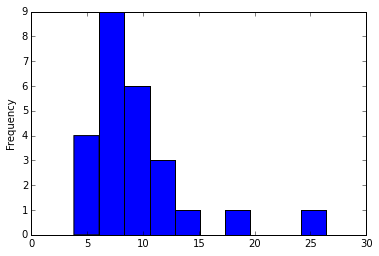

In [59]:

print "Distribution of new diagnosis rates among New England counties"
print just_new_england(time_series(get_df("county","newdx", "overall")))[2016].describe()
just_new_england(time_series(get_df("county","newdx", "overall")))[2016].plot.hist()

# Computing inequality

Let's compare the rates of black and hispanic to white rates of diagnosis and prevalence. We can do this by computing the ratio, the black rate per 100K divided by the white rate. This ratio tells us how much more likely one group was of being diagnosed with HIV than another. This calculation was used in the UConn report to conclude:


"For male and female populations, African-Americans are 2.6 times more likely than their Hispanic/Latino counterparts and 8.4 times more likely than their White counterparts. In 2005, African-Americans were 2.5 times more likely than their Hispanic/Latino counterparts and 7.9 times more likely than their White counterparts to be diagnosed with HIV, providing further evidence that the dis- parity in the incidence rate of HIV in the African-American population continues to grow."

In [60]:
def ratio(a, b):
    
    return a / b

def ts_ratio(dfa, dfb):
    
    ret = dfa.copy()
    for c in dfa.columns:
        ret[c] = ret[c] / dfb[c]
        
    return ret

### Computing diagnosis disparity

Let's recalculate this statement in the UConn report (see References at top of notebook):

The estimated annual HIV diagnosis rate in 2016 among
African-American males was __82.8__ per 100,000 population ...
Among the male populations, the HIV diagnosis rate is __38.8__
per 100,000 for Hispanics/Latinos and __10.6__ per 100,000 for
Whites ... These numbers indicate that
African-American males are 2.1 times more likely than their
Hispanic/Latino counterparts and 7.8 times more likely than
their White counterparts to be diagnosed with HIV.

In [61]:
print "First, we see that the 2016 diagnosis number for black males was 82.8 "

just_new_england(
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"),sub_cols=["Race/Ethnicity", "Sex"])["Black/African American"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"),sub_cols=["Race/Ethnicity", "Sex"])["Black/African American"]["Male"]
    ])
)


First, we see that the 2016 diagnosis number for black males was 82.8 


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,106.8,101.3,96.0,91.2,86.7,83.8,84.2,83.9,82.8
Connecticut,66.6,75.1,66.5,68.5,57.9,69.2,54.0,44.1,52.8
Maine,18.2,87.7,157.0,118.6,14.0,82.1,120.8,91.1,75.8
Massachusetts,88.6,88.9,65.5,79.5,67.5,57.9,67.5,48.7,70.4
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,71.2,70.5,65.7,51.5,34.1,25.2,49.2,36.3,35.8
Vermont,0.0,43.7,0.0,36.2,34.7,98.0,94.4,0.0,29.6


In [62]:
print "Next, we confirm the 2016 diagnosis rate for Hispanic/Latino was 38.8 "

just_new_england(
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"),sub_cols=["Race/Ethnicity", "Sex"])["Hispanic/Latino"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"),sub_cols=["Race/Ethnicity", "Sex"])["Hispanic/Latino"]["Male"]
    ])
)


Next, we confirm the 2016 diagnosis rate for Hispanic/Latino was 38.8 


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,46.4,43.7,41.1,39.9,39.8,38.1,39.8,39.2,38.8
Connecticut,50.2,46.0,40.3,39.4,29.9,38.0,28.3,29.5,27.9
Maine,46.8,44.9,0.0,15.4,44.0,28.0,26.6,38.3,12.2
Massachusetts,55.1,65.1,55.9,53.9,56.7,58.2,50.8,45.8,43.9
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,54.7,78.0,54.3,32.1,32.9,29.9,39.7,27.8,23.5
Vermont,28.9,0.0,55.3,26.0,0.0,0.0,22.8,43.8,0.0


In [63]:
print "Next, we confirm the 2016 diagnosis rate for whites was 10.6."

just_new_england(
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"),sub_cols=["Race/Ethnicity", "Sex"])["White"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"),sub_cols=["Race/Ethnicity", "Sex"])["White"]["Male"]
    ])
)


Next, we confirm the 2016 diagnosis rate for whites was 10.6.


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,13.3,12.7,12.2,11.7,11.6,11.2,11.1,10.7,10.6
Connecticut,6.8,8.0,10.3,8.7,6.8,7.8,6.5,7.4,5.9
Maine,6.3,5.7,7.0,5.7,4.9,3.2,4.9,5.1,4.7
Massachusetts,11.7,10.7,11.7,9.9,10.7,11.0,9.3,9.0,9.9
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,10.7,10.7,13.3,14.8,9.5,11.1,9.6,6.0,7.9
Vermont,6.0,4.8,5.6,3.6,3.6,2.8,3.6,2.4,2.8


In [64]:
print "Now, let's try out our ratio function and see that we get a Black/Hispanic male ratio of 2.1"

# ts_ratio(us_newdx_race_sex_ts["Black/African American"]["Male"],us_newdx_race_sex_ts["Hispanic/Latino"]["Male"])

ts_ratio(
    multi_sub_timeseries(get_df("us","newdx","race-gender"))["Black/African American"]["Male"],
    multi_sub_timeseries(get_df("us","newdx","race-gender"))["Hispanic/Latino"]["Male"],
)

Now, let's try out our ratio function and see that we get a Black/Hispanic male ratio of 2.1


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,2.301724,2.318078,2.335766,2.285714,2.178392,2.199475,2.115578,2.140306,2.134021


In [65]:
print "Finally, we can confirm the black/white male ratio of 7.8"

#ts_ratio(us_newdx_race_sex_ts["Black/African American"]["Male"],us_newdx_race_sex_ts["White"]["Male"])

ts_ratio(
    multi_sub_timeseries(get_df("us","newdx","race-gender"))["Black/African American"]["Male"],
    multi_sub_timeseries(get_df("us","newdx","race-gender"))["White"]["Male"],
)

Finally, we can confirm the black/white male ratio of 7.8


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,8.030075,7.976378,7.868852,7.794872,7.474138,7.482143,7.585586,7.841121,7.811321


Now let's try to confirm the male and female combined black/white disparity. For some reason, I'm getting slightly different numbers.

In [66]:
tmpdf = get_df("us","newdx","race")

ts_ratio(time_series(tmpdf[tmpdf["Race/Ethnicity"] == "Black/African American"]),
        time_series(tmpdf[tmpdf["Race/Ethnicity"] == "White"]))

ts_ratio(
    sub_timeseries(get_df("us","newdx","race"))["Black/African American"],
    sub_timeseries(get_df("us","newdx","race"))["White"],
)

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,9.842105,9.760563,9.529412,9.338462,8.830769,8.774194,8.693548,8.704918,8.816667


In [67]:
ts_ratio(
    sub_timeseries(get_df("us","newdx","race"))["Black/African American"],
    sub_timeseries(get_df("us","newdx","race"))["Hispanic/Latino"],
)

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,2.561644,2.538462,2.612903,2.55042,2.474138,2.45045,2.333333,2.36,2.382883


### Diagnosis disparity ratio by race alone

In [68]:
print "Black-white new diagnosis disparity ratio"

just_new_england(
    ts_ratio(
        pd.concat([
            sub_timeseries(get_df("us","newdx","race"))["Black/African American"],
            sub_timeseries(get_df("state","newdx","race"))["Black/African American"]
        ]),
        pd.concat([
            sub_timeseries(get_df("us","newdx","race"))["White"],
            sub_timeseries(get_df("state","newdx","race"))["White"]
        ])
    )
)

Black-white new diagnosis disparity ratio


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,9.842105,9.760563,9.529412,9.338462,8.830769,8.774194,8.693548,8.704918,8.816667
Connecticut,11.568182,12.065217,8.666667,9.729167,11.771429,9.478261,13.117647,8.250000,12.200000
Maine,12.314286,31.272727,38.111111,47.551724,25.413793,47.000000,55.321429,42.080000,38.600000
Massachusetts,12.061538,11.982759,9.890625,12.053571,10.500000,8.311475,10.377358,9.115385,10.103448
New Hampshire,40.391304,12.714286,4.815789,11.666667,18.451613,6.541667,27.086957,16.944444,21.375000
Rhode Island,11.924242,9.379310,8.243243,4.573333,7.520833,4.866667,6.943396,8.361111,7.911111
Vermont,0.000000,7.545455,7.096774,10.400000,18.136364,34.875000,40.636364,0.000000,11.928571


### Diagnosis disparity ratio by race and gender

In [69]:
print "Black-white male new diagnosis disparity ratio"

just_new_england(
    ts_ratio(
        pd.concat([
            multi_sub_timeseries(get_df("us","newdx","race-gender"))["Black/African American"]["Male"],
            multi_sub_timeseries(get_df("state","newdx","race-gender"))["Black/African American"]["Male"]
        ]),
        pd.concat([
            multi_sub_timeseries(get_df("us","newdx","race-gender"))["White"]["Male"],
            multi_sub_timeseries(get_df("state","newdx","race-gender"))["White"]["Male"]
        ])
    )
)

Black-white male new diagnosis disparity ratio


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,8.030075,7.976378,7.868852,7.794872,7.474138,7.482143,7.585586,7.841121,7.811321
Connecticut,9.794118,9.387500,6.456311,7.873563,8.514706,8.871795,8.307692,5.959459,8.949153
Maine,2.888889,15.385965,22.428571,20.807018,2.857143,25.656250,24.653061,17.862745,16.127660
Massachusetts,7.572650,8.308411,5.598291,8.030303,6.308411,5.263636,7.258065,5.411111,7.111111
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,6.654206,6.588785,4.939850,3.479730,3.589474,2.270270,5.125000,6.050000,4.531646
Vermont,0.000000,9.104167,0.000000,10.055556,9.638889,35.000000,26.222222,0.000000,10.571429


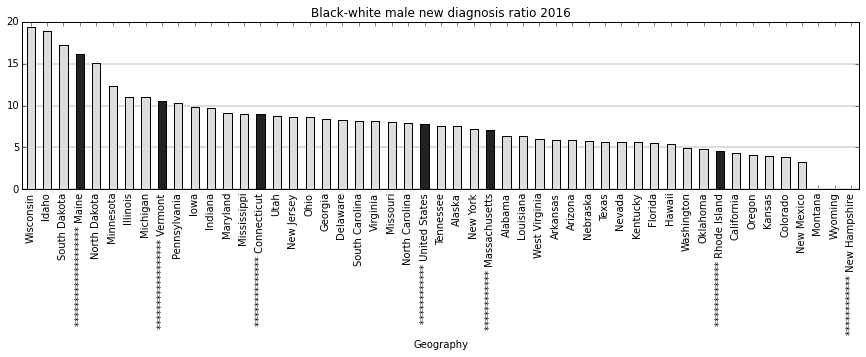

In [70]:
state_bars(ts_ratio(
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"))["Black/African American"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"))["Black/African American"]["Male"]
    ]),
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"))["White"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"))["White"]["Male"]
    ])
)[2016].sort_values(ascending=False),
          title="Black-white male new diagnosis ratio 2016")
    

In [71]:
print "Hispanic-white new diagnosis disparity ratio"

just_new_england(
    ts_ratio(
        pd.concat([
            multi_sub_timeseries(get_df("us","newdx","race-gender"))["Hispanic/Latino"]["Male"],
            multi_sub_timeseries(get_df("state","newdx","race-gender"))["Hispanic/Latino"]["Male"]
        ]),
        pd.concat([
            multi_sub_timeseries(get_df("us","newdx","race-gender"))["White"]["Male"],
            multi_sub_timeseries(get_df("state","newdx","race-gender"))["White"]["Male"]
        ])
    )
)

Hispanic-white new diagnosis disparity ratio


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Geography,,,,,,,,,
United States,3.488722,3.440945,3.368852,3.410256,3.431034,3.401786,3.585586,3.663551,3.660377
Connecticut,7.382353,5.750000,3.912621,4.528736,4.397059,4.871795,4.353846,3.986486,4.728814
Maine,7.428571,7.877193,0.000000,2.701754,8.979592,8.750000,5.428571,7.509804,2.595745
Massachusetts,4.709402,6.084112,4.777778,5.444444,5.299065,5.290909,5.462366,5.088889,4.434343
New Hampshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rhode Island,5.112150,7.289720,4.082707,2.168919,3.463158,2.693694,4.135417,4.633333,2.974684
Vermont,4.816667,0.000000,9.875000,7.222222,0.000000,0.000000,6.333333,18.250000,0.000000


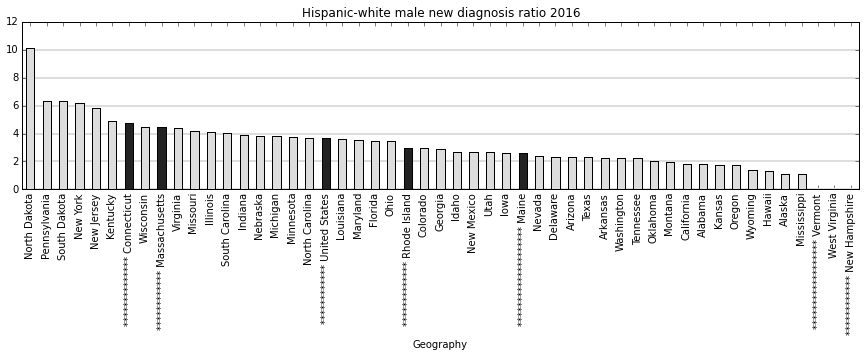

In [72]:
state_bars(ts_ratio(
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"))["Hispanic/Latino"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"))["Hispanic/Latino"]["Male"]
    ]),
    pd.concat([
        multi_sub_timeseries(get_df("us","newdx","race-gender"))["White"]["Male"],
        multi_sub_timeseries(get_df("state","newdx","race-gender"))["White"]["Male"]
    ])
)[2016].sort_values(ascending=False),
          title="Hispanic-white male new diagnosis ratio 2016")
    

### Prevalence disparity by race and gender

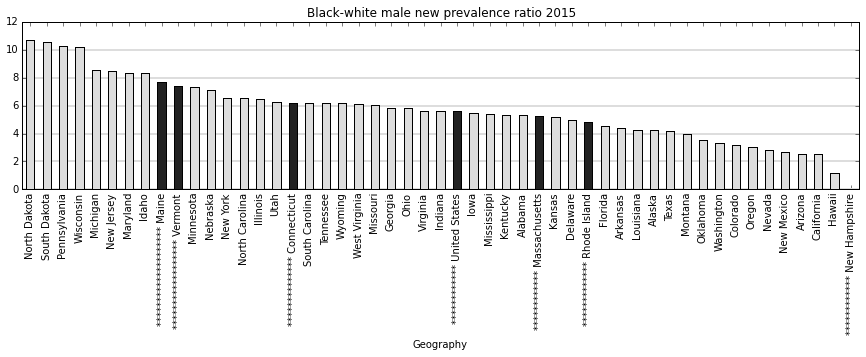

In [73]:
state_bars(ts_ratio(
    pd.concat([
        multi_sub_timeseries(get_df("us","prev","race-gender"))["Black/African American"]["Male"],
        multi_sub_timeseries(get_df("state","prev","race-gender"))["Black/African American"]["Male"]
    ]),
    pd.concat([
        multi_sub_timeseries(get_df("us","prev","race-gender"))["White"]["Male"],
        multi_sub_timeseries(get_df("state","prev","race-gender"))["White"]["Male"]
    ])
)[2015].sort_values(ascending=False),
          title="Black-white male new prevalence ratio 2015")
    

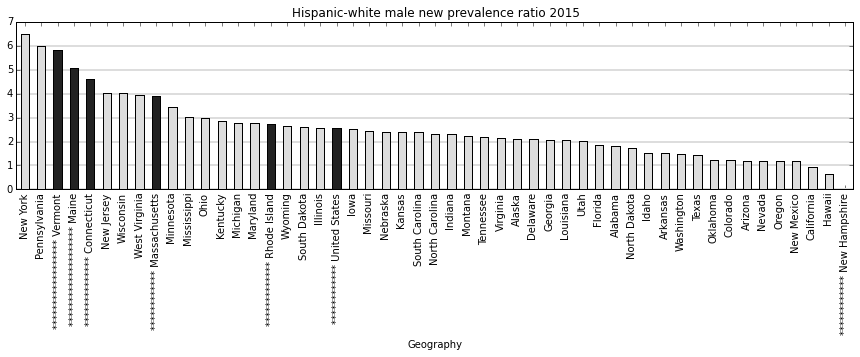

In [74]:
state_bars(ts_ratio(
    pd.concat([
        multi_sub_timeseries(get_df("us","prev","race-gender"))["Hispanic/Latino"]["Male"],
        multi_sub_timeseries(get_df("state","prev","race-gender"))["Hispanic/Latino"]["Male"]
    ]),
    pd.concat([
        multi_sub_timeseries(get_df("us","prev","race-gender"))["White"]["Male"],
        multi_sub_timeseries(get_df("state","prev","race-gender"))["White"]["Male"]
    ])
)[2015].sort_values(ascending=False),
          title="Hispanic-white male new prevalence ratio 2015")
    

### Prevalence disparity ratios at the county level

Because county data doesn't break down by gender, we'll just look by race alone.

In [75]:
print "This is how many rows (out of about 3,000) have data"

len(pd.concat([
    #multi_sub_timeseries(get_df("us","prev","race"), sub_cols=["Race/Ethnicity"])["Black/African American"],
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Black/African American"]
])[2015].dropna())


This is how many rows (out of about 3,000) have data


1333

#### Summary of black-white county level prevalence disparity

There are 1216 rows with valid black-white prevalence ratios.

The average ratio is 8.4, meaning HIV is 8.4 times more prevalent among the black population than the white population.

Half of counties have a ratio somewhere between 4.6 and 9.5.

The median ratio is 6.5, meaning half of ratios are below that and half are above it.

In [76]:
ts_ratio(
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Black/African American"],
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
).describe()

Year,2015
count,1216.000000
mean,8.465088
std,7.351736
min,0.822989
25%,4.641609
50%,6.594978
75%,9.504457
max,83.164486


In [77]:
# Just a test. This should all be 1s.
ts_ratio(
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"],
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
).describe()

Year,2015
count,1861.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


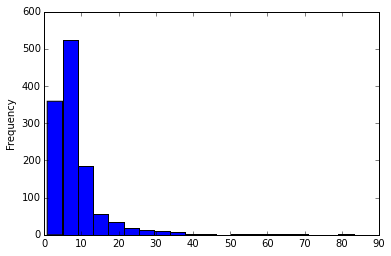

In [78]:
ts_ratio(
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Black/African American"],
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
)[2015].plot.hist(bins=20)

We can see in the table below that most new england counties have a higher black-white prevalence ratio than the national figure.

In [79]:
print "New England Counties and US black-white prevalence ratio, 2015"

just_new_england(
    pd.concat([
        ts_ratio(
            multi_sub_timeseries(get_df("us","prev","race"), sub_cols=["Race/Ethnicity"])["Black/African American"],      
            multi_sub_timeseries(get_df("us","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
        ),
        ts_ratio(
            multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Black/African American"],      
            multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
        )
    ])
)[2015].dropna().sort_values(ascending=False).to_frame()

New England Counties and US black-white prevalence ratio, 2015


,2015
Geography,
"Windham County, VT",20.796770
"Windham County, CT",18.787611
"Penobscot County, ME",16.657514
"Cumberland County, ME",15.811835
"Windsor County, VT",15.179754
"Middlesex County, MA",13.832143
"Worcester County, MA",13.041597
"Franklin County, MA",12.497105
"Newport County, RI",11.336420


#### Summary of hispanic-white prevalence disparity

There are 910 counties with valid data.

The average ratio is 5.8.

The median is 2.57.

50% of counties have a ratio somewhere between 1.6 and 4.5.

In [80]:
ts_ratio(
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Hispanic/Latino"],
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
).describe()

Year,2015
count,910.000000
mean,5.859219
std,12.093394
min,0.377314
25%,1.597173
50%,2.577998
75%,4.499138
max,137.437500


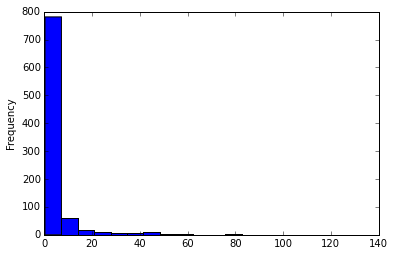

In [81]:
ts_ratio(
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Hispanic/Latino"],
    multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
)[2015].plot.hist(bins=20)

We can see below that the Hispanic/white prevalence ratio is higher than the US ratio in almost every New England county.

In [82]:
print "New England Counties and US hispanc-white prevalence ratio, 2016"

just_new_england(
    pd.concat([
        ts_ratio(
            multi_sub_timeseries(get_df("us","prev","race"), sub_cols=["Race/Ethnicity"])["Hispanic/Latino"],      
            multi_sub_timeseries(get_df("us","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
        ),
        ts_ratio(
            multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["Hispanic/Latino"],      
            multi_sub_timeseries(get_df("county","prev","race"), sub_cols=["Race/Ethnicity"])["White"]
        )
    ])
)[2015].dropna().sort_values(ascending=False).to_frame()

New England Counties and US hispanc-white prevalence ratio, 2016


,2015
Geography,
"Hancock County, ME",11.346939
"Plymouth County, MA",9.041783
"Windsor County, VT",8.235572
"Hampden County, MA",7.921981
"Chittenden County, VT",7.908781
"Worcester County, MA",7.149750
"Hartford County, CT",7.051700
"Berkshire County, MA",6.837864
"Windham County, CT",6.719764


### What's up with Suffolk? High rates, but low disparity

Suffolk notably has a very low prevalence disparity between black-white and hispanic-white. In fact, it has the lowest in New England. Let's see why....

It turns out, in the table below you can see Suffolk has a (relatively) very high  white HIV rate.

In [83]:
get_df("county","prev","race").set_index("Geography").loc["Suffolk County, MA"]

,Indicator,Year,FIPS,Age Group,Race/Ethnicity,Sex,Transmission Category,Cases,Rate per 100000,Population
Geography,,,,,,,,,,
"Suffolk County, MA",HIV prevalence,2015,25025,Ages 13 years and older,Black/African American,Both sexes,All transmission categories,2161.0,1589.7,135937.0
"Suffolk County, MA",HIV prevalence,2015,25025,Ages 13 years and older,Hispanic/Latino,Both sexes,All transmission categories,1390.0,1009.3,137720.0
"Suffolk County, MA",HIV prevalence,2015,25025,Ages 13 years and older,White,Both sexes,All transmission categories,1973.0,597.8,330026.0


### County prevalence by race

In [84]:
print "U.S. Rank of New England counties, White HIV prevalence"
print ("Suffolk, Mass. has the 15th highest white HIV prevalence rate")

just_new_england(
    sub_timeseries(get_df("county","prev","race"),sub_col="Race/Ethnicity")["White"]\
    .sort_values(by=2015,ascending=False).rank(ascending=False)
).head(11)

U.S. Rank of New England counties, White HIV prevalence
Suffolk, Mass. has the 15th highest white HIV prevalence rate


Year,2015
Geography,
"Suffolk County, MA",15.0
"Barnstable County, MA",47.0
"Dukes County, MA",129.0
"Providence County, RI",140.0
"New Haven County, CT",185.0
"Bristol County, MA",190.0
"Hampden County, MA",252.0
"Essex County, VT",273.0
"Essex County, MA",285.5


In [85]:
print "U.S. Rank of New England counties, Black HIV prevalence"

just_new_england(
    sub_timeseries(get_df("county","prev","race"),sub_col="Race/Ethnicity")["Black/African American"]\
    .sort_values(by=2015,ascending=False).rank(ascending=False)
).head(20)

U.S. Rank of New England counties, Black HIV prevalence


Year,2015
Geography,
"Windham County, VT",21.0
"Cumberland County, ME",43.0
"Middlesex County, MA",71.0
"Windham County, CT",73.0
"Windsor County, VT",116.0
"Suffolk County, MA",119.0
"Essex County, MA",122.0
"Worcester County, MA",124.0
"Franklin County, MA",131.0


In [86]:
print "U.S. Rank of New England counties, Hispanic/Latino HIV prevalence"

just_new_england(
    sub_timeseries(get_df("county","prev","race"),sub_col="Race/Ethnicity")["Hispanic/Latino"]\
    .sort_values(by=2015,ascending=False).rank(ascending=False)
).head(30)

U.S. Rank of New England counties, Hispanic/Latino HIV prevalence


Year,2015
Geography,
"Barnstable County, MA",71.0
"Hampden County, MA",88.0
"Dukes County, MA",89.0
"Hancock County, ME",91.0
"Suffolk County, MA",111.0
"Hartford County, CT",113.5
"Bristol County, MA",115.0
"Plymouth County, MA",117.0
"Chittenden County, VT",124.0


# OUTPUT FOR CHARTS

The stuff below is for generating data to feed the graphics.

What I'll need:

1. Small choropleth - New England State-level prevalence for black
2. Small choropleth - New England State-level prevalence for hispanic/latino
3. Small choropleth - New England State-level prevalence for white
4. County-level overall choropleth


In [103]:
just_new_england(time_series(get_df("county","prev","overall"))).dropna()

Year,2015
Geography,
"Addison County, VT",101.7
"Androscoggin County, ME",150.8
"Aroostook County, ME",56.7
"Barnstable County, MA",385.0
"Belknap County, NH",150.5
"Bennington County, VT",149.1
"Berkshire County, MA",151.2
"Bristol County, MA",273.7
"Bristol County, RI",88.5


In [104]:
just_new_england(sub_timeseries(get_df("state","prev","race"))["White"])

Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
Connecticut,138.3,138.5,145.2,145.0,145.0,149.0,142.6,145.4
Maine,76.1,77.9,95.1,95.9,97.3,98.3,102.7,103.9
Massachusetts,158.7,160.8,167.4,172.1,177.0,179.2,180.7,181.8
New Hampshire,69.5,70.4,74.4,76.2,77.1,78.5,81.4,82.4
Rhode Island,123.1,126.5,136.1,142.1,144.1,146.6,152.3,155.1
Vermont,63.1,65.2,74.5,81.0,89.1,94.9,102.0,101.9


In [110]:
just_new_england(sub_timeseries(get_df("state","prev","race"))["Hispanic/Latino"])

Year,2008,2009,2010,2011,2012,2013,2014,2015
Geography,,,,,,,,
Connecticut,1023.0,992.7,972.5,934.6,910.3,894.3,829.5,829.9
Maine,497.8,507.3,669.2,675.5,594.3,651.8,617.3,625.4
Massachusetts,954.2,945.1,916.2,926.8,926.7,927.4,912.1,899.8
New Hampshire,560.2,542.0,602.6,560.4,510.3,484.8,511.8,485.0
Rhode Island,523.4,552.8,572.4,544.2,542.1,535.6,545.2,540.9
Vermont,407.1,389.8,510.7,485.4,489.5,438.4,490.3,604.5


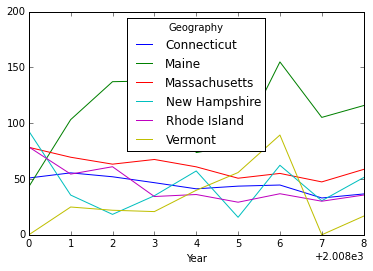

In [187]:
just_new_england(sub_timeseries(get_df("state","newdx","race"))["Black/African American"]).transpose().plot(ylim=(0,200))

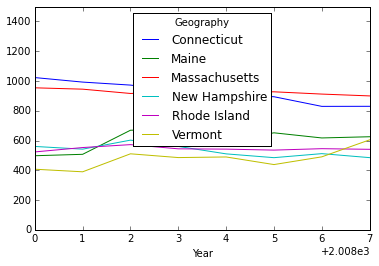

In [186]:
just_new_england(sub_timeseries(get_df("state","prev","race"))["Hispanic/Latino"]).transpose().plot(ylim=(0,1500))

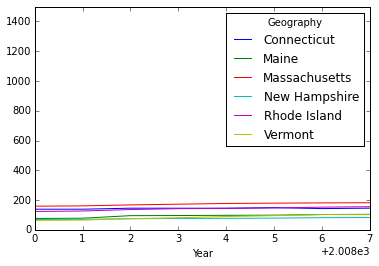

In [121]:
just_new_england(sub_timeseries(get_df("state","prev","race"))["White"]).transpose().plot(ylim=(0,1500))

In [178]:
# Combine prevalence data for 2015
def ne_table(topic="prev", year=2015):
    ret = just_new_england(sub_timeseries(
        pd.concat([get_df("state",topic,"race"),
                   get_df("us",topic,"race")])
    )["Black/African American"])[year].to_frame()\
    .join(just_new_england(sub_timeseries(
        pd.concat([get_df("state",topic,"race"),
                   get_df("us",topic,"race")])
    )["Hispanic/Latino"])[year].to_frame(), rsuffix="_h")\
    .join(just_new_england(sub_timeseries(
        pd.concat([get_df("state",topic,"race"),
                   get_df("us",topic,"race")])
    )["White"])[year].to_frame(), rsuffix="_w")
    
    ret.columns = ["black", "hispanic", "white"]
    ret["bw"] = ret["black"] / ret["white"]
    ret["hw"] = ret["hispanic"] / ret["white"]
    
    def fips_lookup(x):
        try: 
            return us.states.lookup(unicode(x)).fips
        except:
            pass
        return -1
    
    def ap_lookup(x):
        try: 
            return us.states.lookup(unicode(x)).ap_abbr
        except:
            return "U.S."
        return -1

                          
            
    #ret["fips"] = ret.index.map(lambda x: us.states.lookup(unicode(x)).fips)
    ret["fips"] = ret.index.map(fips_lookup)
    ret["ap"] = ret.index.map(ap_lookup)


    return ret

ne_table().to_csv("output/bhw-prev-2015.csv")


In [179]:
us.states.lookup(u"Connecticut").ap_abbr

u'Conn.'

In [184]:
ne_table(topic="newdx", year=2016)

,black,hispanic,white,bw,hw,fips,ap
Geography,,,,,,,
Connecticut,36.6,16.4,3.0,12.200000,5.466667,09,Conn.
Maine,115.8,6.2,3.0,38.600000,2.066667,23,Maine
Massachusetts,58.6,30.5,5.8,10.103448,5.258621,25,Mass.
New Hampshire,51.3,19.6,2.4,21.375000,8.166667,33,N.H.
Rhode Island,35.6,15.0,4.5,7.911111,3.333333,44,R.I.
United States,52.9,22.2,6.0,8.816667,3.700000,-1,U.S.
Vermont,16.7,0.0,1.4,11.928571,0.000000,50,Vt.


In [338]:
# Data for small timelines

def small_timelines_table(subgroup="race", 
                          vals="Rate per 100000",
                          sub_col="Race/Ethnicity", 
                          subgroup_names=["Black/African American","Hispanic/Latino","White"]):
    
    def get(sg):
        ret = pd.concat([sub_timeseries(get_df("us","newdx", subgroup), 
                                        sub_col=sub_col,
                                        vals=vals)[sg],
                         sub_timeseries(get_df("state","newdx", subgroup),
                                        vals=vals,
                                        sub_col=sub_col)[sg]])
        ret[subgroup] = sg
        return ret

#     b = get("Black/African American")
#     h = get("Hispanic/Latino")
#     w = get("White")
    
#     b["race"]="Black/African American"
#     h["race"]="Hispanic/Latino"
#     w["race"]="White"
    
    #ret = pd.concat([b, h, w])
    ret = pd.concat([get(x) for x in subgroup_names])
    ret = just_new_england(ret)
    
    return ret

small_timelines_table().to_csv("output/small-timelines.csv")
small_timelines_table()



Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,race
Geography,,,,,,,,,,
United States,74.8,69.3,64.8,60.7,57.4,54.4,53.9,53.1,52.9,Black/African American
Connecticut,50.9,55.5,52.0,46.7,41.2,43.6,44.6,33.0,36.6,Black/African American
Maine,43.1,103.2,137.2,137.9,73.7,79.9,154.9,105.2,115.8,Black/African American
Massachusetts,78.4,69.5,63.3,67.5,60.9,50.7,55.0,47.4,58.6,Black/African American
New Hampshire,92.9,35.6,18.3,35.0,57.2,15.7,62.3,30.5,51.3,Black/African American
Rhode Island,78.7,54.4,61.0,34.3,36.1,29.2,36.8,30.1,35.6,Black/African American
Vermont,0.0,24.9,22.0,20.8,39.9,55.8,89.4,0.0,16.7,Black/African American
United States,29.2,27.3,24.8,23.8,23.2,22.2,23.1,22.5,22.2,Hispanic/Latino
Connecticut,34.2,28.4,28.7,29.1,21.8,23.4,17.2,18.7,16.4,Hispanic/Latino


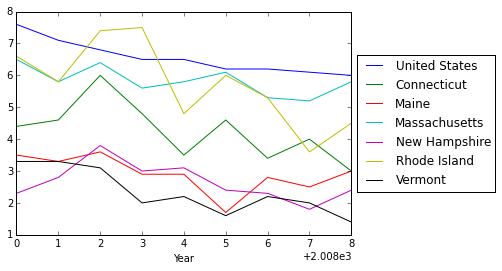

In [336]:
race_timeseries = lambda race: pd.concat([sub_timeseries(get_df("us","newdx", "race"))[race],
                         sub_timeseries(get_df("state","newdx", "race"))[race]])
def time_chart(df):
    
    f = plt.figure()
#     ax = df.transpose().plot(legend=False)
    df.transpose().plot(kind='line', ax=f.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
time_chart(just_new_england(race_timeseries("White")))

### Transmission analysis


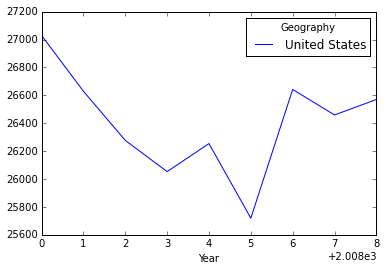

In [319]:
multi_sub_timeseries(
    get_df("us","newdx","transmission-overall"), 
    vals="Cases", 
    sub_cols=["Transmission Category"]
)['Male-to-male sexual contact'].transpose().plot()

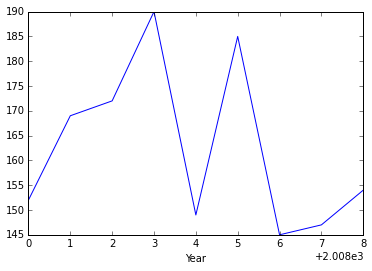

In [320]:
just_new_england(
    multi_sub_timeseries(get_df("state","newdx","transmission-overall"), vals="Cases", sub_cols=["Transmission Category"])['Male-to-male sexual contact']
).loc["Connecticut"].transpose().plot()

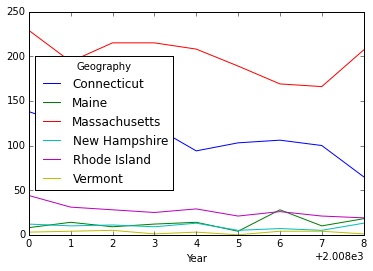

In [317]:
just_new_england(
    multi_sub_timeseries(get_df("state","newdx","transmission-overall"), vals="Cases", sub_cols=["Transmission Category"])['Heterosexual contact']
).transpose().plot()

In [267]:
time_series(get_df("state","newdx","overall"), vals="Cases").loc["Connecticut"]

Year
2008    357
2009    357
2010    396
2011    358
2012    291
2013    328
2014    290
2015    273
2016    251
Name: Connecticut, dtype: int64

In [367]:
def pct_manner(year):
    
    total = time_series(get_df("state","newdx","overall"), vals="Cases").loc["Connecticut"][year]
    
    return pd.pivot_table(
        get_df("state","newdx","transmission-overall"),
        values="Cases",
        columns="Transmission Category",
        index=["Geography","Year"]).loc["Connecticut", year] * 100 / total

for y in range(2008, 2017):
    print y, pct_manner(y)["Male-to-male sexual contact"]

2008 42.5770308123
2009 47.3389355742
2010 43.4343434343
2011 53.0726256983
2012 51.2027491409
2013 56.4024390244
2014 50.0
2015 53.8461538462
2016 61.3545816733


In [289]:
pd.pivot_table(
    get_df("state","newdx","transmission-race"),
    values="Cases",
    columns="Transmission Category",
    index=["Geography","Year","Race/Ethnicity"]).loc["Connecticut", 2016,"Black/African American"]

Transmission Category
Heterosexual contact                                  46.0
Injection drug use                                    12.0
Male-to-male sexual contact                           51.0
Male-to-male sexual contact and injection drug use     2.0
Other                                                  0.0
Name: (Connecticut, 2016, Black/African American), dtype: float64

In [288]:
20 + 18 + 4

42

In [295]:
float(46 + 12 + 51 + 2) * 100. / 251,

(44.223107569721115,)

In [298]:
pd.pivot_table(
    get_df("state","newdx","transmission-race"),
    values="Cases",
    columns="Transmission Category",
    index=["Geography","Year","Race/Ethnicity"]).loc["Connecticut", 2016,"Hispanic/Latino"]

Transmission Category
Heterosexual contact                                  13.0
Injection drug use                                     8.0
Male-to-male sexual contact                           49.0
Male-to-male sexual contact and injection drug use     1.0
Other                                                  0.0
Name: (Connecticut, 2016, Hispanic/Latino), dtype: float64

In [373]:
### Make a table for transmission bar charts

small_timelines_table(subgroup="transmission-overall",
                      vals="Cases",
                     subgroup_names=[
                         "Male-to-male sexual contact",
                         "Male-to-male sexual contact and injection drug use",
                         "Other",
                         "Heterosexual contact",
                         "Injection drug use"],
                     sub_col="Transmission Category")\
.reset_index().set_index(["Geography","transmission-overall"])[2016].to_frame().to_csv("output/transmission-2016.csv")